In [43]:
import pandas as pd
import numpy as np

#### SMS Spam Detection System

This project focuses on building an SMS Spam Detection system using
Natural Language Processing (NLP) and Machine Learning techniques.
The model preprocesses text data, extracts features, and predicts
whether a message is spam or legitimate (ham).


In [44]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### data cleaning

In [45]:
df.shape

(5572, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [48]:
(df==0).sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [49]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [50]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# renaming the columns
df.columns

Index(['v1', 'v2'], dtype='object')

In [52]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [53]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [55]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
# check duplicate value 
df.duplicated().sum()

np.int64(403)

In [57]:
# remove duplicate value
df = df.drop_duplicates(keep='first')

In [58]:
df.duplicated().sum()

np.int64(0)

### 2.EDA

In [59]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

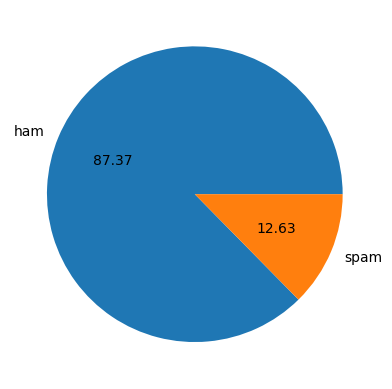

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### NLTK (Natural Language Toolkit) – Definition

NLTK is a Python library used for working with human language data (text).
It provides easy-to-use tools for text processing, analysis, and natural language understanding.

In [61]:
import nltk

In [62]:
# Calculate the total number of characters in each text message
df['num_characters'] = df['text'].apply(len)

In [63]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [64]:
# Calculate the number of words in each text message
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [65]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [66]:
# This line tokenizes the text into sentences and counts the total number of sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [68]:
# This line provides a statistical summary of characters, words, and sentence counts
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
# Generate descriptive statistics for text features of non-spam (ham) messages
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
# Generate descriptive statistics for text features of spam (spam) messages
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [71]:
import seaborn as sns

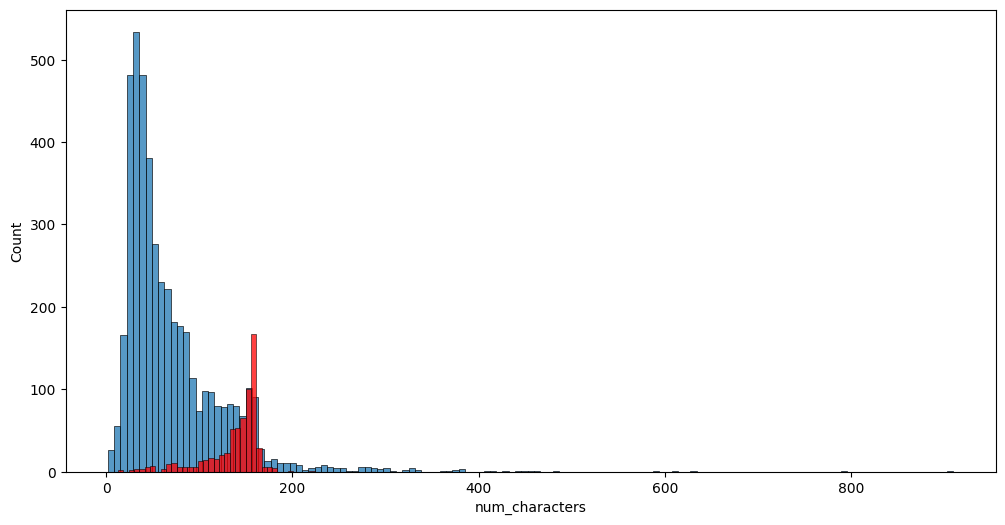

In [72]:
# This histogram compares character count distribution between ham (0) and spam (1) messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

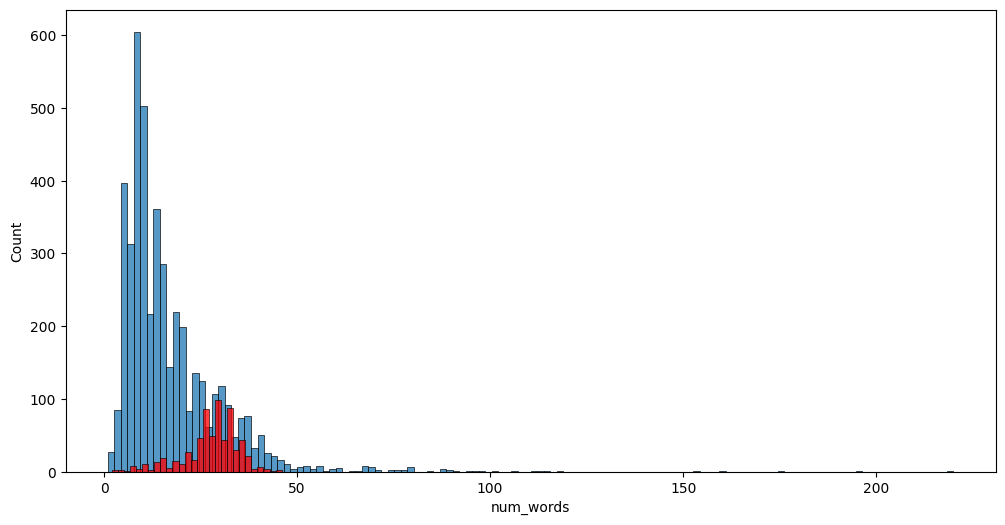

In [73]:
# This histogram compares the word count distribution between ham (0) and spam (1) messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

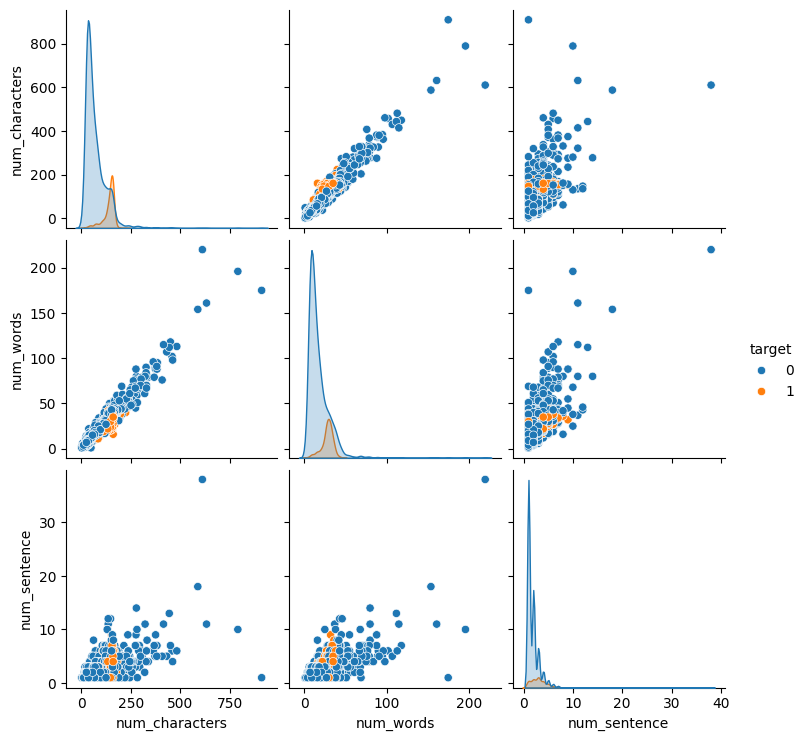

In [133]:
# This pair plot shows pairwise relationships between features and helps compare spam and ham messages
sns.pairplot(df,hue='target')
plt.show()

In [75]:
# This line computes correlation coefficients between numerical variables in the dataset
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

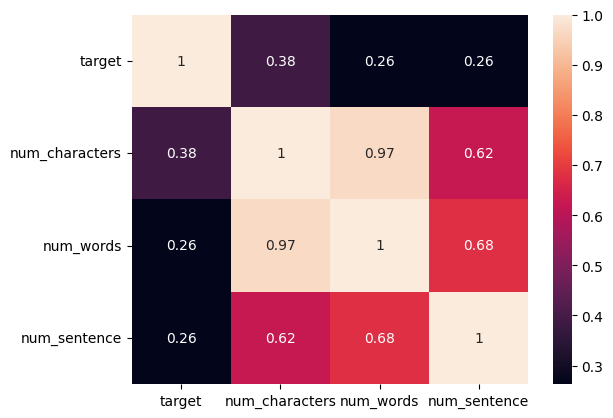

In [76]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### data preprocessing
#### lower case
#### Tokenization
#### Removing stop words and punctuation
#### stemming

In [77]:
# Initialize Porter Stemmer and apply stemming to a word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [98]:
# Function to preprocess and clean text data
def transform_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text into words
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # Apply stemming to each word
    for i in text:
        y.append(ps.stem(i))
        
    # Join processed words back into a single string
    return " ".join(y)


In [99]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [103]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [97]:
# Import English stopwords and display the list of common words to be removed during text preprocessing
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [101]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
df['transformed_text'] = df['text'].apply(transform_text)

In [104]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
# This code initializes a WordCloud object to visualize the most frequent words in the text data
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [106]:
# Generate a word cloud for spam messages using the transformed text
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

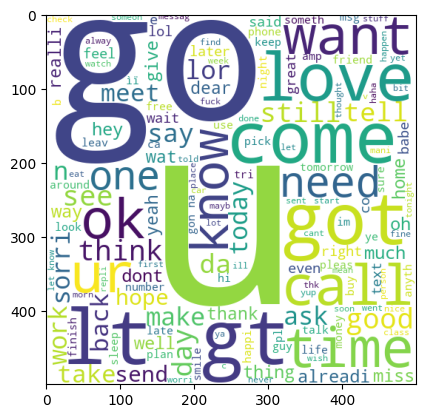

In [134]:
# Display the spam word cloud
plt.imshow(spam_wc)
plt.show()

In [108]:
# Generate a word cloud for ham messages using the transformed text
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

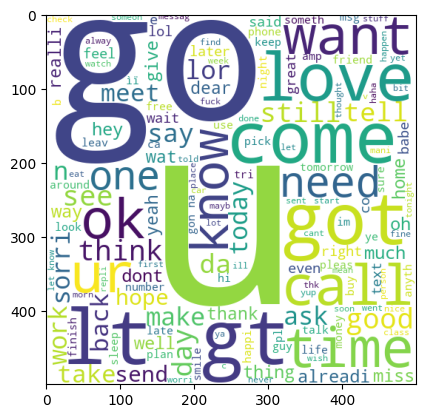

In [135]:
# Display the ham word cloud
plt.imshow(ham_wc)
plt.show()

In [110]:
# This code extracts individual words from transformed spam messages and stores them in a spam corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [111]:
len(spam_corpus)

9939

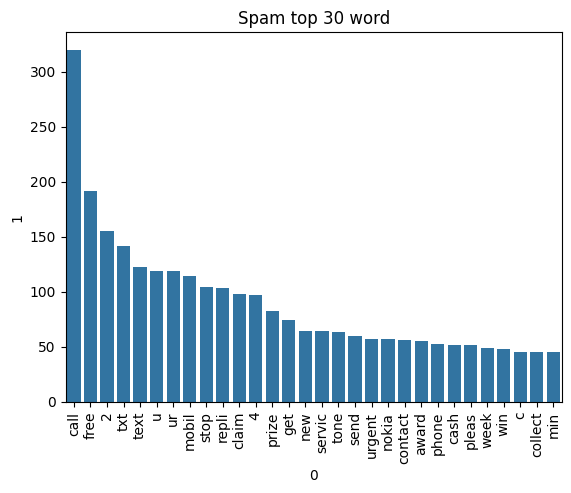

In [118]:
# Plot a bar chart of the top 30 most frequent words in spam messages
from collections import Counter

sns.barplot(
    x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.title('Spam top 30 word')
plt.xticks(rotation=90)
plt.show()

In [119]:
# Create a corpus of words from all ham (non-spam) messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [120]:
len(ham_corpus)

35404

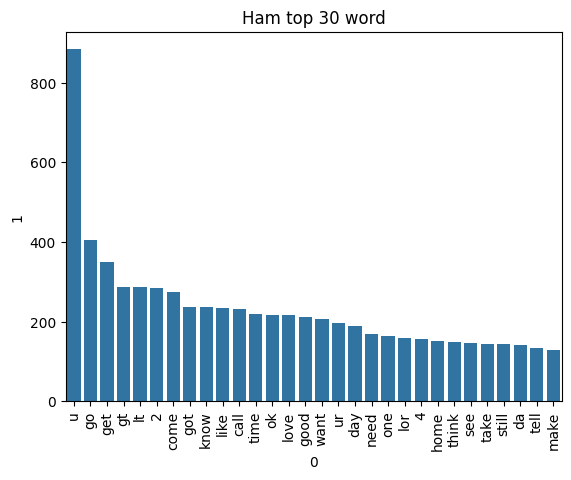

In [121]:
# Plot a bar chart of the top 30 most frequent words in ham (non-spam) messages
sns.barplot(
    x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
)
plt.title('Ham top 30 word')
plt.xticks(rotation=90)
plt.show()

### Model building


In [122]:
# This code initializes vectorizers to convert text data into numerical features
# CountVectorizer uses word frequency, while TF-IDF considers word importance
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [123]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [124]:
x.shape

(5169, 6708)

In [125]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [126]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### 🔹 Naive Bayes – Definition

Naive Bayes is a probabilistic machine learning algorithm based on Bayes’ Theorem, used for classification tasks.
It assumes that all features are independent of each other, which is why it is called “naive”.

In simple words:
Naive Bayes predicts a class by calculating probabilities.

$$
P(C|X) = \frac{P(X|C)\times P(C)}{P(X)}
$$




#### Where
- $P(C|X)$ → Posterior Probability (final prediction)
- $P(X|C)$ → Likelihood
- $P(C)$ → Prior Probability
- $P(X)$ → Evidence

#### Gaussian Naive Bayes

Used when features are continuous and normally distributed.

$$
P(x|C) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$


#### Where
- $x$ → Feature value
- $\mu$ → Mean of the feature for class $C$
- $\sigma^2$ → Variance of the feature for class $C$
- $P(x|C)$ → Likelihood of feature value given class


### Multinomial Naive Bayes
Used when features represent word counts or word frequencies.

$$
P(x_i|C) = \frac{count(x_i, C) + 1}{\sum count(C) + V}
$$


#### Where
- $x_i$ → i-th word / feature
- $C$ → Class (Spam / Ham)
- $count(x_i, C)$ → Word $x_i$ ka count class C mein
- $\sum count(C)$ → Class C ke total words
- $V$ → Vocabulary size (unique words)


#### Bernoulli Naive Bayes
Used when features are binary (0/1).

$$
P(x_i|C) = p_i^{x_i}(1-p_i)^{(1-x_i)}
$$


#### Where
- $x_i$ → Feature value (0 or 1)
- $p_i$ → Probability that feature $x_i = 1$ given class C
- $C$ → Class label


In [127]:
# Import Naive Bayes classifiers and evaluation metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [129]:
# Train the Gaussian Naive Bayes model and evaluate its performance
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [130]:
# Train the Multinomial Naive Bayes model and evaluate its performance
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [131]:
# Train the Bernoulli Naive Bayes model and evaluate its performance
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [132]:
# Save the trained TF-IDF vectorizer and Multinomial Naive Bayes model using pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

#### Conclusion:
In this project, an SMS Spam Detection system was successfully developed using Natural Language Processing (NLP) and machine learning techniques. The dataset was first cleaned and explored to understand the structure and patterns in spam and non-spam messages. Text preprocessing steps such as converting text to lowercase, tokenization, removing stop words and punctuation, and stemming helped transform raw messages into a meaningful numerical format. After preprocessing, machine learning models were trained and evaluated to classify messages as spam or ham. The results show that NLP-based models can effectively identify spam messages with good accuracy. This project demonstrates how data preprocessing and proper model selection play a crucial role in building an efficient text classification system, which can be useful for real-world spam filtering applications.